In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df_train = pd.read_csv("C:/Users/Nimisha Jain/Documents/Machine Learning/Expedia/expedia-hotel-recommendations/train.csv")
df_test = pd.read_csv('C:/Users/Nimisha Jain/Documents/Machine Learning/Expedia/expedia-hotel-recommendations/test.csv')
df_des = pd.read_csv('C:/Users/Nimisha Jain/Documents/Machine Learning/Expedia/expedia-hotel-recommendations/destinations.csv')

In [3]:
df_train.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
df_train.shape

(37670293, 24)

In [5]:
df_des.head()

,srch_destination_id,d1,d2,d3,d4,d5,d6,d7,d8,d9,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,0,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-1.897627,-2.198657,-2.198657,-1.897627,...,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657,-2.198657
1,1,-2.181690,-2.181690,-2.181690,-2.082564,-2.181690,-2.165028,-2.181690,-2.181690,-2.031597,...,-2.165028,-2.181690,-2.165028,-2.181690,-2.181690,-2.165028,-2.181690,-2.181690,-2.181690,-2.181690
2,2,-2.183490,-2.224164,-2.224164,-2.189562,-2.105819,-2.075407,-2.224164,-2.118483,-2.140393,...,-2.224164,-2.224164,-2.196379,-2.224164,-2.192009,-2.224164,-2.224164,-2.224164,-2.224164,-2.057548
3,3,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.115485,-2.177409,-2.177409,-2.177409,...,-2.161081,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409,-2.177409
4,4,-2.189562,-2.187783,-2.194008,-2.171153,-2.152303,-2.056618,-2.194008,-2.194008,-2.145911,...,-2.187356,-2.194008,-2.191779,-2.194008,-2.194008,-2.185161,-2.194008,-2.194008,-2.194008,-2.188037


In [6]:
df_test.head()

,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538


In [7]:
df_test.shape

(2528243, 22)

In [8]:
df_train = df_train.dropna()
df_train = df_train[df_train.is_booking!=0]
df_train = df_train.drop(columns=['is_booking','cnt'])

In [9]:
df = df_train.sample(frac=0.01, random_state=42)
df.shape

(19855, 22)

In [10]:
df_train.columns

Index(['date_time', 'site_name', 'posa_continent', 'user_location_country',
       'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster'],
      dtype='object')

In [11]:
df_test.columns

Index(['id', 'date_time', 'site_name', 'posa_continent',
       'user_location_country', 'user_location_region', 'user_location_city',
       'orig_destination_distance', 'user_id', 'is_mobile', 'is_package',
       'channel', 'srch_ci', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt',
       'srch_rm_cnt', 'srch_destination_id', 'srch_destination_type_id',
       'hotel_continent', 'hotel_country', 'hotel_market'],
      dtype='object')

In [12]:
df_test = df_test.drop(columns=['id'])

c:\users\nimisha jain\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


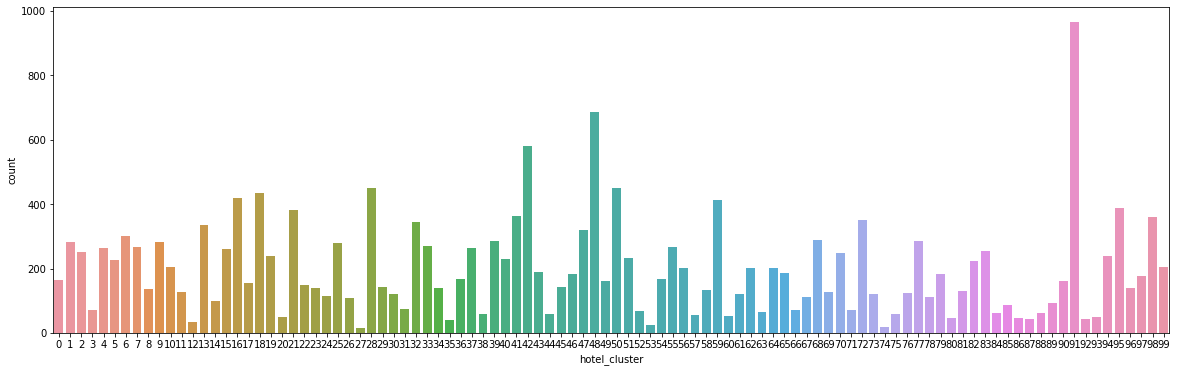

In [13]:
plt.figure(figsize=(20,6))
plot = sns.countplot(df['hotel_cluster'])

c:\users\nimisha jain\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


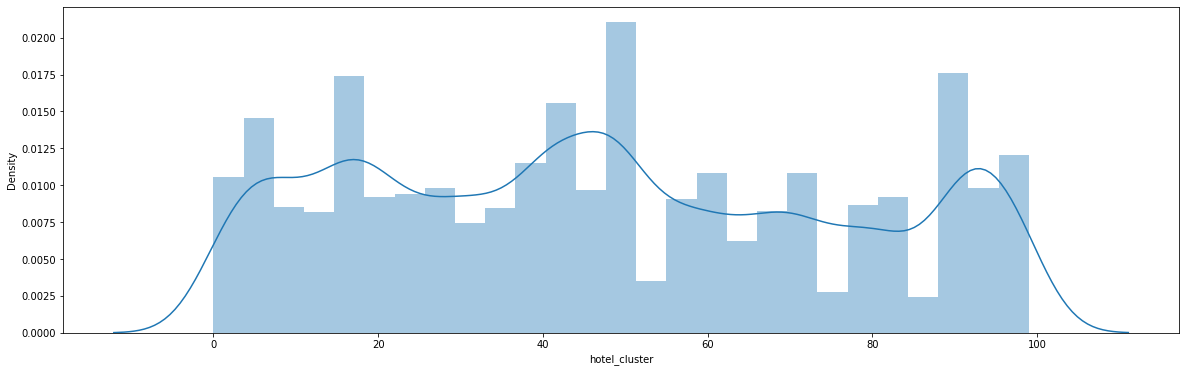

In [14]:
plt.figure(figsize=(20,6))
plot = sns.distplot(df['hotel_cluster'])

Feature Engineering

In [15]:
from datetime import datetime
def year(x):
    if type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').year
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year
    else:
        return x
    pass

In [16]:
def month(x):
    if type(x) is not float:
        try:
            return datetime.strptime(x, '%Y-%m-%d').month
        except ValueError:
            return datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month
    else:
        return x
    pass

In [17]:
def left_merge_dataset(left_dframe, right_dframe, merge_column):
    return pd.merge(left_dframe, right_dframe, on=merge_column, how='left')

In [18]:
df_train['search_year'] = pd.Series(df_train['date_time'],index=df_train.index)
df_train['search_month'] = pd.Series(df_train['date_time'],index=df_train.index)
df_train['search_year'] = df_train['search_year'].apply(lambda x: year(x))
df_train['search_month'] = df_train['search_month'].apply(lambda x: month(x))
df_train['checkin_year'] = pd.Series(df_train['srch_ci'],index=df_train.index)
df_train['checkin_month'] = pd.Series(df_train['srch_ci'],index=df_train.index)
df_train['checkin_year'] = df_train['checkin_year'].apply(lambda x: year(x))
df_train['checkin_month'] = df_train['checkin_month'].apply(lambda x: month(x))
df_train['checkout_year'] = pd.Series(df_train['srch_co'],index=df_train.index)
df_train['checkout_month'] = pd.Series(df_train['srch_co'],index=df_train.index)
df_train['checkout_year'] =df_train['checkout_year'].apply(lambda x: year(x))
df_train['checkout_month'] = df_train['checkout_month'].apply(lambda x: month(x))

In [19]:
df['search_year'] = pd.Series(df['date_time'],index=df.index)
df['search_month'] = pd.Series(df['date_time'],index=df.index)
df['search_year'] = df['search_year'].apply(lambda x: year(x))
df['search_month'] = df['search_month'].apply(lambda x: month(x))
df['checkin_year'] = pd.Series(df['srch_ci'],index=df.index)
df['checkin_month'] = pd.Series(df['srch_ci'],index=df.index)
df['checkin_year'] = df['checkin_year'].apply(lambda x: year(x))
df['checkin_month'] = df['checkin_month'].apply(lambda x: month(x))
df['checkout_year'] = pd.Series(df['srch_co'],index=df.index)
df['checkout_month'] = pd.Series(df['srch_co'],index=df.index)
df['checkout_year'] = df['checkout_year'].apply(lambda x: year(x))
df['checkout_month'] = df['checkout_month'].apply(lambda x: month(x))

In [20]:
df_test['search_year'] = pd.Series(df_test['date_time'],index=df_test.index)
df_test['search_month'] = pd.Series(df_test['date_time'],index=df_test.index)
df_test['search_year'] = df_test['search_year'].apply(lambda x: year(x))
df_test['search_month'] = df_test['search_month'].apply(lambda x: month(x))
df_test['checkin_year'] = pd.Series(df_test['srch_ci'],index=df_test.index)
df_test['checkin_month'] = pd.Series(df_test['srch_ci'],index=df_test.index)
df_test = df_test.drop(312920)
df_test['checkin_year'] = df_test['checkin_year'].apply(lambda x: year(x))
df_test['checkin_month'] = df_test['checkin_month'].apply(lambda x: month(x))
df_test['checkout_year'] = pd.Series(df_test['srch_co'],index=df_test.index)
df_test['checkout_month'] = pd.Series(df_test['srch_co'],index=df_test.index)
df_test['checkout_year'] = df_test['checkout_year'].apply(lambda x: year(x))
df_test['checkout_month'] = df_test['checkout_month'].apply(lambda x: month(x))

In [21]:
df_train = df_train.drop(columns = ['date_time','srch_ci','srch_co'])
df = df.drop(columns = ['date_time','srch_ci','srch_co'])
df_test = df_test.drop(columns = ['date_time','srch_ci','srch_co'])

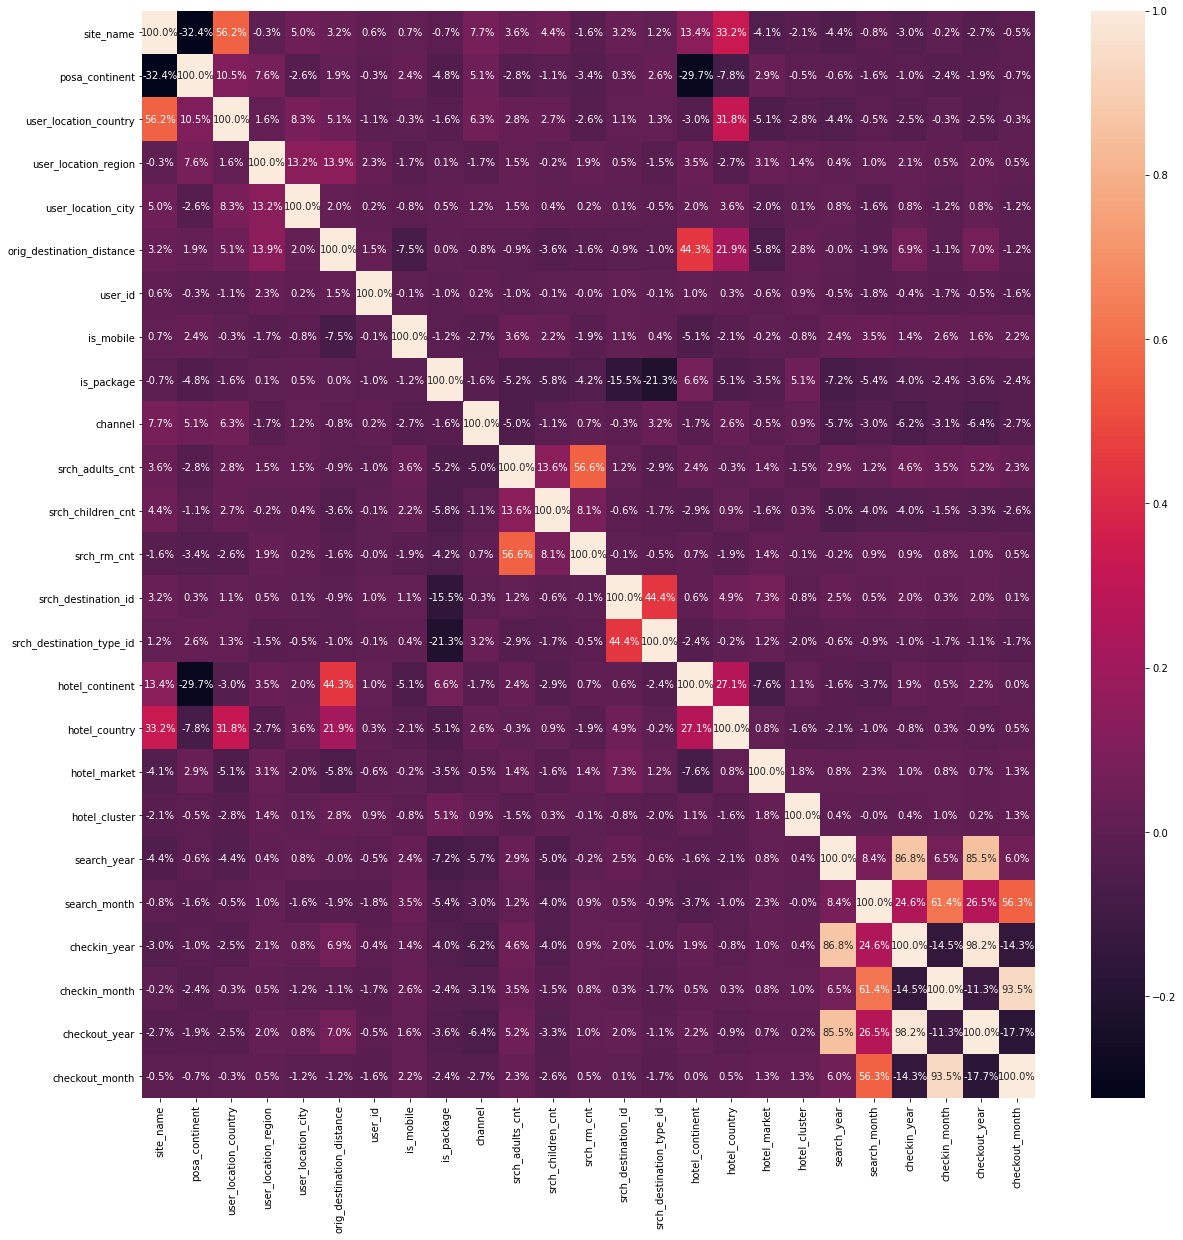

In [22]:
plt.figure(figsize=(20,20))
plot = sns.heatmap(df.corr(),annot=True,fmt=".1%")

In [23]:
df_train.shape

(1985514, 25)

In [24]:
df_test.shape

(2528242, 24)

In [25]:
df.shape

(19855, 25)

Machine Learning Model

In [26]:
from sklearn.model_selection import train_test_split
import ml_metrics as metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

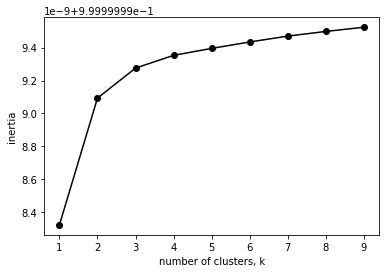

In [27]:
for k in range(1,10):
    pca = PCA(n_components=k)
    des_pca = pca.fit_transform(df_des)
    pca_ratio = pca.explained_variance_ratio_
plt.plot(range(1,10), pca_ratio.cumsum(), '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.show()

In [28]:
pca = PCA(n_components=3)
des = pca.fit_transform(df_des)
des = pd.DataFrame(des)
des["srch_destination_id"] = df_des["srch_destination_id"]
df_des = des

In [29]:
df = df.join(df_des,on='srch_destination_id',how='left',rsuffix='des')
df = df.drop(columns=['srch_destination_iddes'])

In [30]:
df = df.dropna()
X = df.drop(columns=['hotel_cluster'])
y= df['hotel_cluster']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

Basic Model

In [32]:
top_cluster = y_train.value_counts().head().index

In [33]:
print(top_cluster)

Int64Index([91, 48, 42, 50, 18], dtype='int64')


In [34]:
predictions = [top_cluster for i in range(y_test.shape[0])]

In [35]:
print(predictions)

[Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48, 42, 50, 18], dtype='int64'), Int64Index([91, 48,

In [36]:
target = [[l] for l in y_test]
print(target)

[[33], [42], [42], [3], [21], [82], [83], [30], [35], [98], [21], [73], [59], [70], [23], [65], [66], [81], [5], [1], [26], [6], [90], [24], [22], [56], [32], [63], [65], [18], [28], [47], [99], [94], [22], [79], [25], [95], [44], [56], [78], [96], [52], [13], [69], [68], [9], [6], [16], [43], [41], [68], [62], [72], [17], [81], [10], [42], [50], [98], [42], [13], [45], [95], [75], [67], [28], [42], [58], [30], [62], [82], [3], [89], [59], [37], [62], [80], [95], [78], [90], [23], [25], [16], [48], [95], [76], [98], [32], [41], [79], [91], [43], [59], [30], [1], [32], [70], [42], [83], [18], [10], [98], [6], [97], [91], [91], [79], [78], [5], [15], [50], [69], [28], [65], [18], [41], [13], [56], [6], [98], [28], [47], [91], [78], [6], [1], [41], [68], [25], [91], [47], [29], [78], [33], [77], [73], [91], [16], [21], [72], [8], [56], [41], [39], [51], [53], [59], [81], [95], [70], [47], [31], [48], [50], [54], [23], [5], [84], [98], [94], [1], [22], [65], [71], [48], [37], [95], [91], [

In [37]:
metrics.mapk(target, predictions, k=5)

0.08594560021544469

Logistic Regression

In [38]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\users\nimisha jain\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [39]:
pred = lr.predict(X_test)

In [40]:
target = [[l] for l in y_test]
prediction = [[i] for i in pred]

In [41]:
metrics.mapk(target, prediction,k=5)

0.0478691173500303

Random Forest

In [42]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [43]:
pred = rfc.predict(X_test)

In [44]:
target = [[l] for l in y_test]
prediction = [[i] for i in pred]
metrics.mapk(target, prediction,k=5)

0.10462532821652192

Submission

In [45]:
df_test = df_test.join(df_des,on='srch_destination_id',how='left',rsuffix='des')
df_test = df_test.drop(columns=['srch_destination_iddes'])

In [46]:
df_test = df_test.fillna(0)
pred = rfc.predict(df_test)

In [47]:
df.shape

(19801, 28)

In [48]:
df_test.shape

(2528242, 27)

In [49]:
df_test['Prediction'] = pred

In [50]:
sub_df = df_test[['user_id','Prediction']]

In [51]:
sub_df['id'] = sub_df['user_id']
sub_df['hotel_cluster'] = sub_df['Prediction']
sub_df = sub_df.drop(columns=['user_id','Prediction'])

c:\users\nimisha jain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\nimisha jain\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [52]:
sub_df.to_csv('Submission.csv')